Xác định và đánh giá mức độ tác động của thể loại đến doanh thu để khảo sát tính khả thi cho việc xây dựng mô hình dự đoán doanh thu phim

In [3]:
import pandas as pd
movie_df = pd.read_csv("clean_data.csv")
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4839 non-null   object 
 1   genres        4839 non-null   object 
 2   type          4839 non-null   object 
 3   rating        4839 non-null   float64
 4   no_of_votes   4839 non-null   int64  
 5   meta_score    4839 non-null   float64
 6   release_date  4808 non-null   float64
 7   gross         2084 non-null   float64
 8   budget        4839 non-null   float64
 9   countries     4839 non-null   object 
 10  url           4839 non-null   object 
 11  ROI           1612 non-null   float64
 12  result        4839 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 491.6+ KB


In [4]:
movie_df.head()

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000,64.732618,2013.0,NaN,25000000.0,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800,34.000000,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.042498,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000,49.000000,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.417608,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000,64.732618,2021.0,NaN,25000000.0,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000,64.732618,2023.0,NaN,25000000.0,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail


In [5]:
filtered_movies = movie_df[(movie_df["release_date"] <= 2024)].dropna(subset=["genres"])
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4839 non-null   object 
 1   genres        4839 non-null   object 
 2   type          4839 non-null   object 
 3   rating        4839 non-null   float64
 4   no_of_votes   4839 non-null   int64  
 5   meta_score    4839 non-null   float64
 6   release_date  4808 non-null   float64
 7   gross         2084 non-null   float64
 8   budget        4839 non-null   float64
 9   countries     4839 non-null   object 
 10  url           4839 non-null   object 
 11  ROI           1612 non-null   float64
 12  result        4839 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 491.6+ KB


In [6]:
from collections import Counter

list_genres = []
for genres in filtered_movies['genres'].dropna():
    list_genres.extend(genres.split(', '))

genres_count = Counter(list_genres)

len(genres_count)

211

In [7]:
genres_df = pd.DataFrame(genres_count.items(), columns=["Genre", "Count"])
top_10_genres_df = genres_df.sort_values(by="Count", ascending=False)[:20]
top_10_genres_df

,Genre,Count
9,Drama,2236
18,Comedy,1387
7,Adventure,912
11,Thriller,788
6,Action,781
15,Crime,756
10,Romance,694
27,Family,623
19,Fantasy,546
8,Animation,528


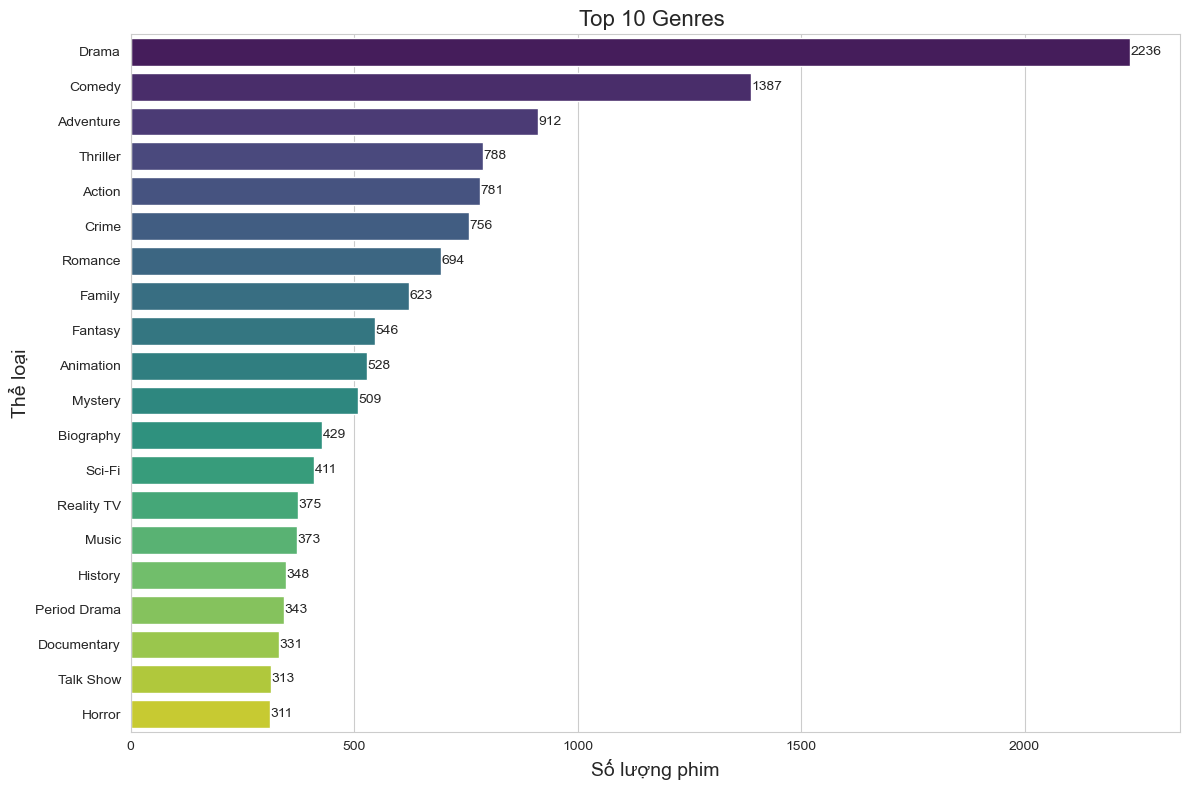

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))  # tăng kích thước để tránh chồng lấn

sns.barplot(
    data=top_10_genres_df,
    x="Count",
    y="Genre",
    palette="viridis",
    legend=False,
    hue = "Genre"
)

plt.title("Top 10 Genres ", fontsize=16)
plt.xlabel("Số lượng phim", fontsize=14)
plt.ylabel("Thể loại", fontsize=14)

# Thêm nhãn số lượng lên trên các cột
for idx, (genre, count) in enumerate(zip(top_10_genres_df["Genre"], top_10_genres_df["Count"])):
    plt.text(count + 1, idx, count, va='center')

plt.tight_layout()
plt.show()

In [9]:
filtered_score_movies = filtered_movies.dropna(subset=["gross", "meta_score", "rating", "no_of_votes", "budget"])
filtered_score_movies.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2020 entries, 2 to 4838
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2020 non-null   object 
 1   genres        2020 non-null   object 
 2   type          2020 non-null   object 
 3   rating        2020 non-null   float64
 4   no_of_votes   2020 non-null   int64  
 5   meta_score    2020 non-null   float64
 6   release_date  2020 non-null   float64
 7   gross         2020 non-null   float64
 8   budget        2020 non-null   float64
 9   countries     2020 non-null   object 
 10  url           2020 non-null   object 
 11  ROI           1593 non-null   float64
 12  result        2020 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 220.9+ KB


In [10]:
filtered_score_movies

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.417608,Success
5,Puss in Boots: The Last Wish,"Animal Adventure, Computer Animation, Fairy Ta...",Movie,7.8,200000,73.0,2022.0,481757663.0,90000000.0,"United States, Japan",https://www.imdb.com/title/tt3915174/?ref_=sr_...,4.352863,Success
14,The Fifth Element,"Sci-Fi Epic, Space Sci-Fi, Action, Adventure, ...",Movie,7.6,524000,52.0,1997.0,263920180.0,25000000.0,"France, United Kingdom",https://www.imdb.com/title/tt0119116/?ref_=sr_...,NaN,Success
17,Superman,"Sci-Fi Epic, Superhero, Urban Adventure, Actio...",Movie,7.4,195000,82.0,1978.0,300478449.0,55000000.0,"United States, United Kingdom, Switzerland, Pa...",https://www.imdb.com/title/tt0078346/?ref_=sr_...,4.463245,Success
20,Red One,"Holiday Comedy, Action, Adventure, Comedy, Fan...",Movie,6.3,137000,34.0,2024.0,185900759.0,350000000.0,"United States, Canada",https://www.imdb.com/title/tt14948432/?ref_=sr...,-0.468855,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,Far and Away,"Romantic Epic, Western Epic, Adventure, Drama,...",Movie,6.6,70000,49.0,1992.0,137783840.0,60000000.0,United States,https://www.imdb.com/title/tt0104231/?ref_=sr_...,1.296397,Success
4832,Pale Rider,"Drama, Western",Movie,7.3,67000,61.0,1985.0,41410568.0,6900000.0,United States,https://www.imdb.com/title/tt0089767/?ref_=sr_...,5.001532,Success
4834,Shanghai Noon,"Buddy Comedy, Martial Arts, Action, Adventure,...",Movie,6.6,138000,77.0,2000.0,99274467.0,55000000.0,"United States, Hong Kong",https://www.imdb.com/title/tt0184894/?ref_=sr_...,0.804990,Success
4837,The Duel,"Drama, Western",Movie,5.8,12000,42.0,2016.0,20672.0,10000000.0,United States,https://www.imdb.com/title/tt2436682/?ref_=sr_...,-0.997933,Fail


In [11]:
avg_score_top_10_genres = []

for _, row in top_10_genres_df.iterrows():
    meta_score = 0
    rating = 0
    no_of_votes = 0
    count = 0
    gross = 0
    budget = 0
    tv_series = 0
    movies = 0
    for _, movie in filtered_score_movies.iterrows():
        if row["Genre"] in movie["genres"]:
            if movie["type"] == "TV Series":
                tv_series += 1
            if movie["type"] == "Movie":
                movies += 1
            count += 1
            meta_score += movie["meta_score"]
            rating += movie["rating"]
            no_of_votes += movie["no_of_votes"]
            gross += movie["gross"]
            budget += movie["budget"]
    if count > 0:
        avg_score_top_10_genres.append({
            "tv_series": tv_series,
            "movies": movies,
            "gross": gross / count,
            "Genre": row["Genre"],
            "meta_score": meta_score / count,
            "rating": rating / count,
            "no_of_votes": no_of_votes / count,
            "budget": budget / count,
        })

avg_score_top_10_genres_df = pd.DataFrame(avg_score_top_10_genres)
avg_score_top_10_genres_df

,tv_series,movies,gross,Genre,meta_score,rating,no_of_votes,budget
0,0,1248,9.413147e+07,Drama,66.991936,7.151603,209420.872596,3.387973e+07
1,0,675,1.684044e+08,Comedy,61.912561,6.779111,205060.582222,4.628329e+07
2,0,527,3.380621e+08,Adventure,63.699134,6.980835,312745.381404,8.613282e+07
3,0,430,1.144299e+08,Thriller,64.586457,6.992326,254353.102326,3.927469e+07
4,0,438,2.847769e+08,Action,61.220057,6.907534,334795.995434,8.144231e+07
5,0,278,1.021543e+08,Crime,67.023679,7.219784,281360.834532,3.317794e+07
6,0,423,1.165012e+08,Romance,63.092148,6.834752,153168.557920,3.462568e+07
7,0,310,2.917168e+08,Family,62.370485,6.750645,200372.064516,7.051661e+07
8,0,296,3.425463e+08,Fantasy,62.152226,6.870270,287292.229730,8.306853e+07
9,0,197,3.302474e+08,Animation,68.112327,7.126396,231336.888325,8.089203e+07


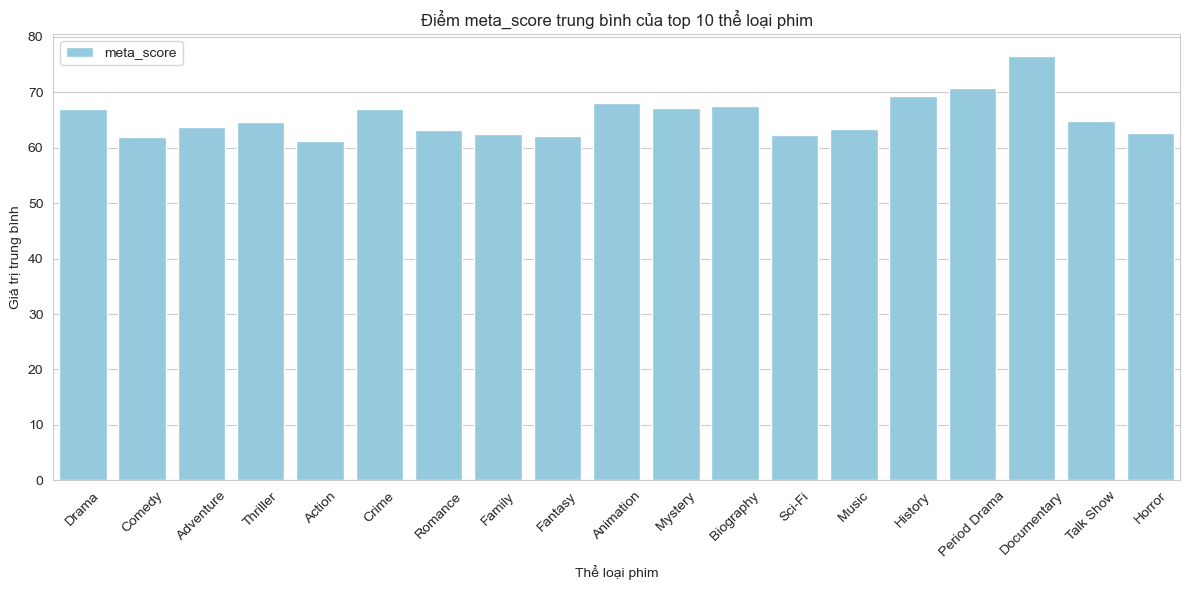

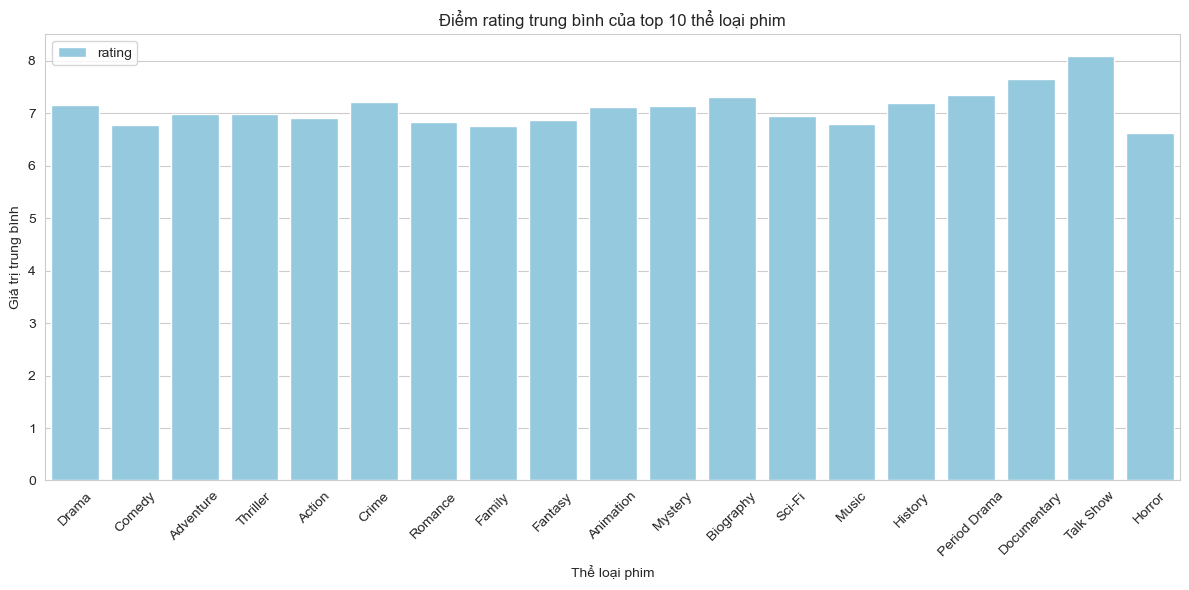

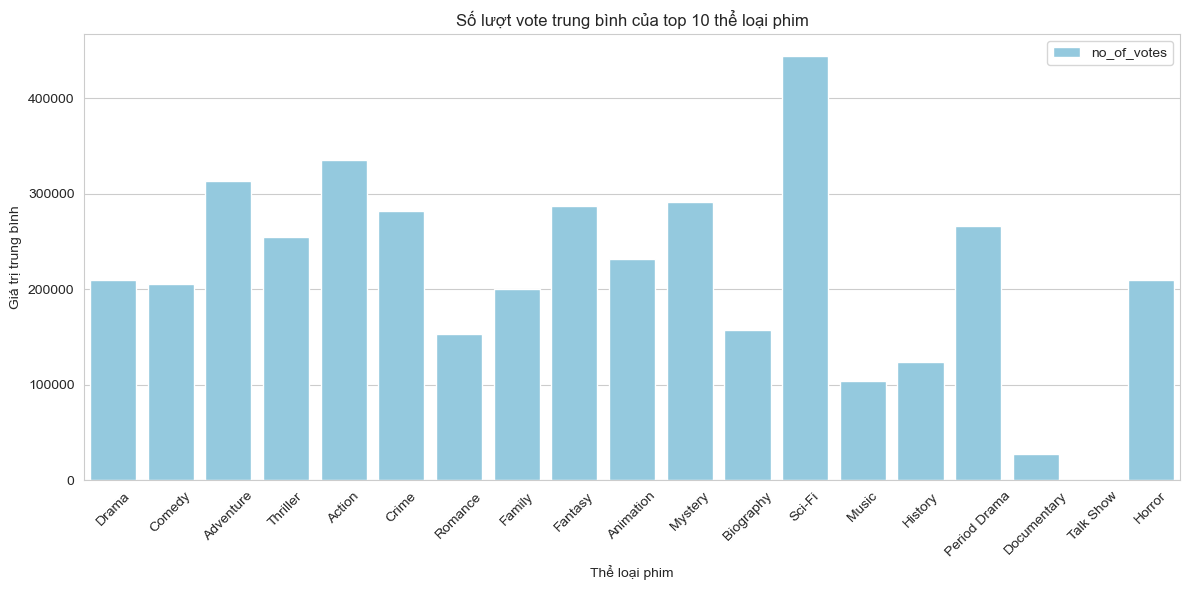

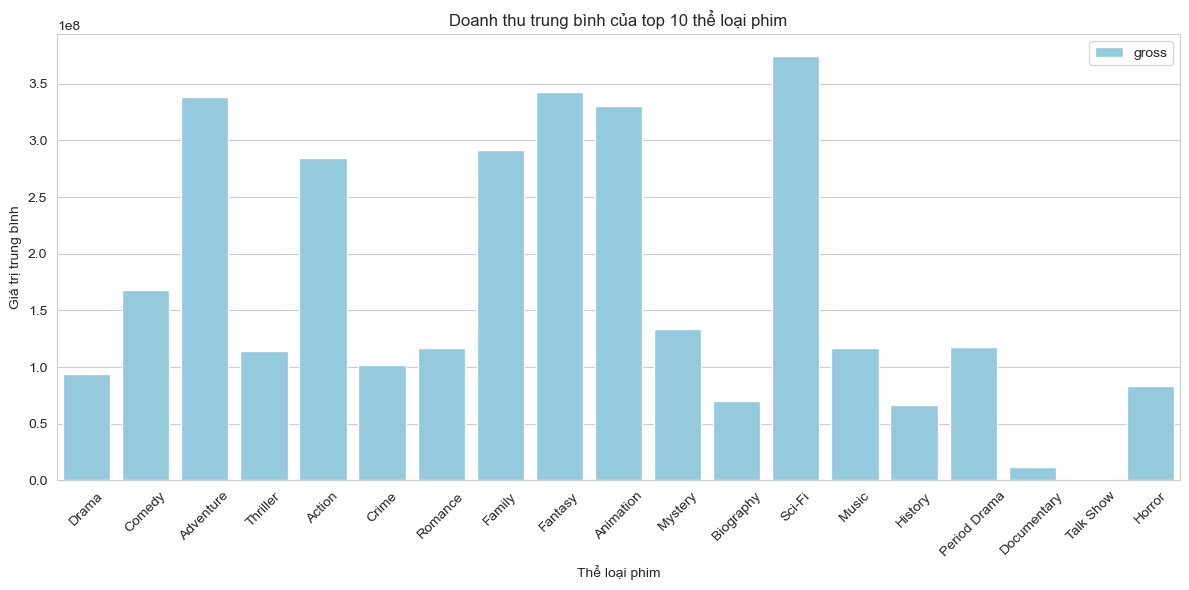

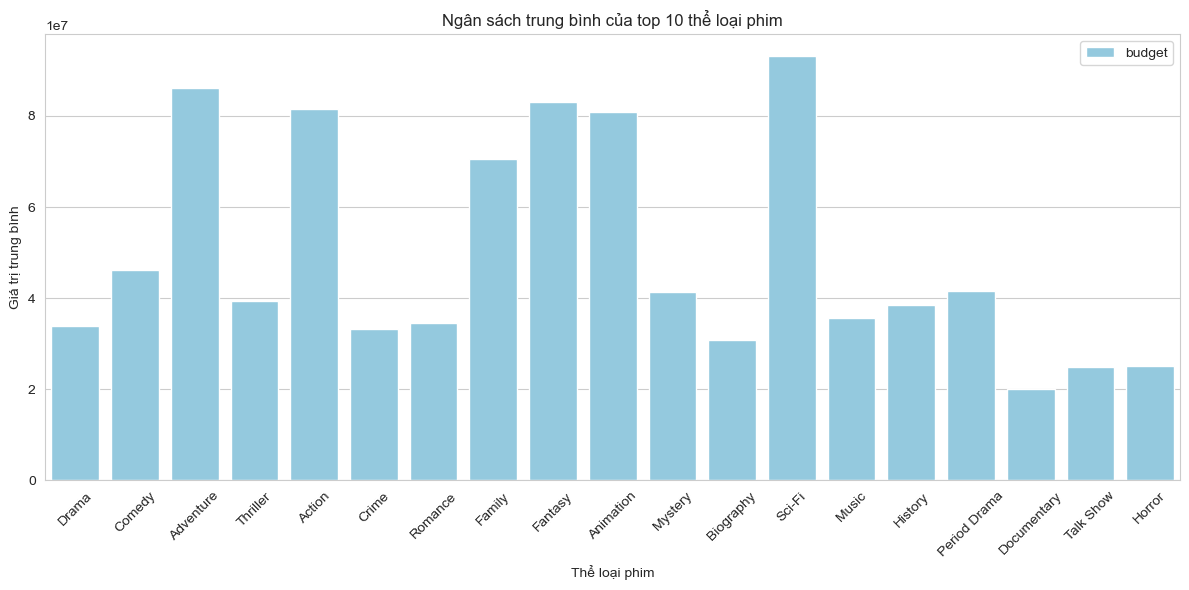

In [12]:
def plot_avg_score(df, column, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='Genre', y=column, color='skyblue', label=column)
    
    plt.title(title)
    plt.ylabel('Giá trị trung bình')
    plt.xlabel('Thể loại phim')
    plt.xticks(rotation=45)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_avg_score(avg_score_top_10_genres_df, 'meta_score', 'Điểm meta_score trung bình của top 10 thể loại phim')
plot_avg_score(avg_score_top_10_genres_df, 'rating', 'Điểm rating trung bình của top 10 thể loại phim')
plot_avg_score(avg_score_top_10_genres_df, 'no_of_votes', 'Số lượt vote trung bình của top 10 thể loại phim')
plot_avg_score(avg_score_top_10_genres_df, 'gross', 'Doanh thu trung bình của top 10 thể loại phim')
plot_avg_score(avg_score_top_10_genres_df, 'budget', 'Ngân sách trung bình của top 10 thể loại phim')


In [13]:
print(avg_score_top_10_genres_df["Genre"].unique())


['Drama' 'Comedy' 'Adventure' 'Thriller' 'Action' 'Crime' 'Romance'
 'Family' 'Fantasy' 'Animation' 'Mystery' 'Biography' 'Sci-Fi' 'Music'
 'History' 'Period Drama' 'Documentary' 'Talk Show' 'Horror']


In [14]:
# Loại bỏ dòng có giá trị NaN hoặc rỗng trong "Genre"
avg_score_top_10_genres_df = avg_score_top_10_genres_df[avg_score_top_10_genres_df["Genre"].notna()]
avg_score_top_10_genres_df = avg_score_top_10_genres_df[avg_score_top_10_genres_df["Genre"] != ""]
# Chuyển cột "Genre" thành biến one-hot
genre_encoded = pd.get_dummies(avg_score_top_10_genres_df["Genre"])

# Ghép với dữ liệu gốc, loại bỏ cột "Genre" gốc
avg_score_top_10_genres_df = avg_score_top_10_genres_df.drop(columns=["Genre"]).join(genre_encoded)
avg_score_top_10_genres_df


,tv_series,movies,gross,meta_score,rating,no_of_votes,budget,Action,Adventure,Animation,...,Fantasy,History,Horror,Music,Mystery,Period Drama,Romance,Sci-Fi,Talk Show,Thriller
0,0,1248,9.413147e+07,66.991936,7.151603,209420.872596,3.387973e+07,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,675,1.684044e+08,61.912561,6.779111,205060.582222,4.628329e+07,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,527,3.380621e+08,63.699134,6.980835,312745.381404,8.613282e+07,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,430,1.144299e+08,64.586457,6.992326,254353.102326,3.927469e+07,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0,438,2.847769e+08,61.220057,6.907534,334795.995434,8.144231e+07,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0,278,1.021543e+08,67.023679,7.219784,281360.834532,3.317794e+07,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,0,423,1.165012e+08,63.092148,6.834752,153168.557920,3.462568e+07,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7,0,310,2.917168e+08,62.370485,6.750645,200372.064516,7.051661e+07,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,0,296,3.425463e+08,62.152226,6.870270,287292.229730,8.306853e+07,False,False,False,...,True,False,False,False,False,False,False,False,False,False
9,0,197,3.302474e+08,68.112327,7.126396,231336.888325,8.089203e+07,False,False,True,...,False,False,False,False,False,False,False,False,False,False


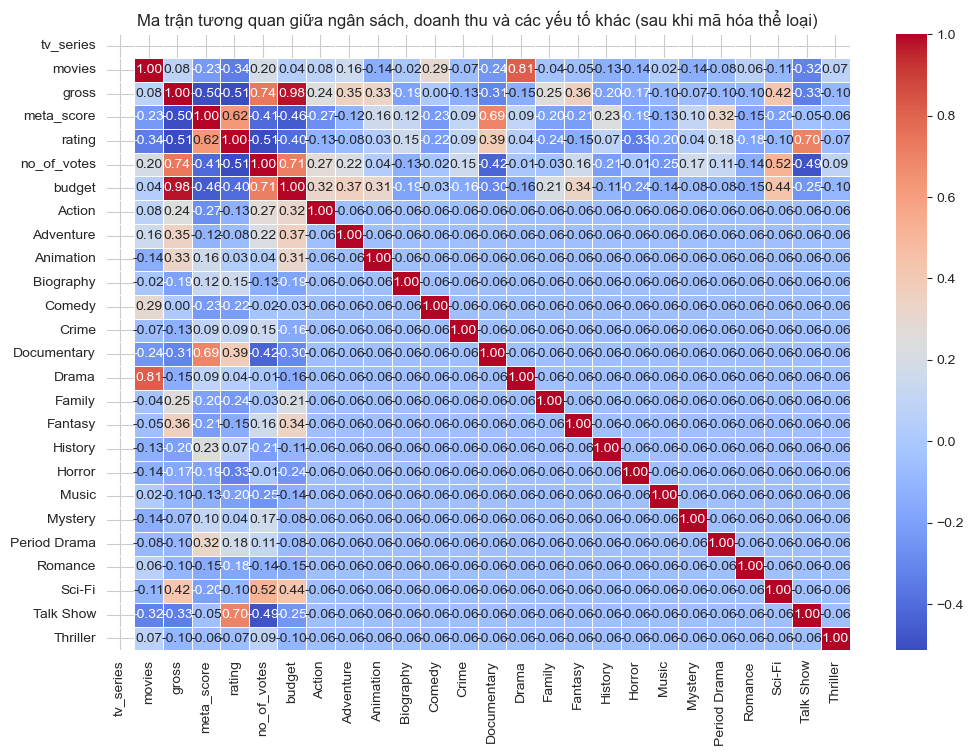

In [15]:

# Tính ma trận tương quan sau khi mã hóa
correlation_matrix = avg_score_top_10_genres_df.corr()

# Vẽ heatmap hiển thị tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan giữa ngân sách, doanh thu và các yếu tố khác (sau khi mã hóa thể loại)")
plt.show()

KẾT LUẬN:
- Thể loại phim có mối quan hệ với doanh thu, ngân sách, loại phim
- Thể loại phim có mối quan hệ ít với quốc gia
- Thể loại phim không có mối quan hệ với rating, meta_score